Before we begin...

Questions:
* How has Covid influenced people?
 * i.e. are people being introspective, working on themselves, etc. or is something else going on?
 * Which backgrounds are most affected?

In [594]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [595]:
jewish_covid_data = pd.read_spss('2020 COVID_Jewish Engagement_High Holidays_SPSS SAV_DB.sav')

In [596]:
#list(jewish_covid_data.columns)

In [597]:
# looking into how columns are structured more...
jewish_covid_data.head()

,record,qAge,qState,q1_1,q1_2,qEthnicity_1,qEthnicity_2,qEthnicity_3,qEthnicity_4,qEthnicity_5,...,qChildren3,qMarital,qHHFaith,qOrientation_1,qOrientation_2,qOrientation_3,qHHIncome,qAbility_1,qAbility_2,ALLWT
0,2.0,63,Arizona,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$35,000 - less than $50,000","Yes, I do",NaN,1.275025
1,3.0,67,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,Yes,Straight or heterosexual,NaN,NaN,"$150,000 to less than $200,000",No,NaN,0.758117
2,4.0,53,Florida,A man,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$75,000 - less than $100,000",No,NaN,1.226917
3,5.0,59,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$50,000 - less than $75,000",No,NaN,1.252093
4,6.0,55,New Jersey,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$200,000 or more",No,NaN,1.252093


In [598]:
jewish_covid_data.shape

(1414, 260)

In [599]:
jewish_covid_data.dtypes

record             float64
qAge              category
qState            category
q1_1              category
q1_2              category
                    ...   
qOrientation_3    category
qHHIncome         category
qAbility_1        category
qAbility_2        category
ALLWT              float64
Length: 260, dtype: object

In [600]:
uniques = jewish_covid_data.nunique()
print(uniques)

record            1414
qAge                73
qState              48
q1_1                 4
q1_2                 3
                  ... 
qOrientation_3       1
qHHIncome            9
qAbility_1           4
qAbility_2           1
ALLWT              253
Length: 260, dtype: int64


In [601]:
print(jewish_covid_data['q1_1'].value_counts(), '\n')
print(jewish_covid_data['q1_2'].value_counts())

A man                       712
A woman                     682
Non-binary                   11
I prefer not to disclose      9
Name: q1_1, dtype: int64 

Non-binary                   3
A woman                      3
I prefer to self describe    1
Name: q1_2, dtype: int64


## What columns to focus on

Looking for actionable self-improvement questions and answers, I looked through the survey document and found the following:

Questions 3, 10 (answers 9-11), 13 (first half), 16 (answers 9-11, maybe earlier answers about yiddishkeit too?), maybe Q21 (don't like it's based on yes to Q18), Q31 (A3,6,10), Q32 (all answers but 2, 99), Q33,34, 41!! (7-10)

I will focus on question 41 and expand from there if need be.

In [602]:
#list(jewish_covid_data2.columns)

## Outcome variable clean-up/analysis

Q41:

* 7)   The pandemic has made it feel more important to connect to God.
* 8)   The pandemic has made it feel more important to connect to the religious or spiritual aspects of being Jewish.
* 9)   The pandemic has made it feel more important to bring Jewish practices into my home.
* 10) The pandemic has made it feel more important to live by my Jewish values in the future.

First step is to create and convert this likert scale outcome variable to a numeric, hopefully continuous variable

In [603]:
cat_columns = jewish_covid_data[[
 'q41r7',
 'q41r8',
 'q41r9',
 'q41r10']].columns

cat_columns

Index(['q41r7', 'q41r8', 'q41r9', 'q41r10'], dtype='object')

In [620]:
jewish_covid_data[[
 'q41r7',
 'q41r8',
 'q41r9',
 'q41r10']]

,q41r7,q41r8,q41r9,q41r10
0,Strongly disagree,Strongly disagree,Somewhat agree,Somewhat agree
1,Somewhat disagree,Somewhat agree,Strongly disagree,Somewhat agree
2,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat disagree
4,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat disagree
...,...,...,...,...
1409,Strongly agree,Somewhat agree,Somewhat disagree,Somewhat agree
1410,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1411,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree
1412,Strongly agree,Somewhat disagree,Somewhat disagree,Somewhat disagree


In [621]:
likert_vals = {'Strongly disagree':-2, 'Somewhat disagree':-1, 'Somewhat agree':1, 'Strongly agree':2}

#get all categorical columns
cat_columns = jewish_covid_data[[
 'q41r7',
 'q41r8',
 'q41r9',
 'q41r10']].columns

jewish_covid_data[cat_columns] = jewish_covid_data[cat_columns].apply(lambda s: s.map({k:i for i,k in enumerate(likert_vals)}))

In [622]:
jewish_covid_data[cat_columns]

,q41r7,q41r8,q41r9,q41r10
0,0,0,2,2
1,1,2,0,2
2,3,3,3,3
3,1,1,1,1
4,0,0,1,1
...,...,...,...,...
1409,3,2,1,2
1410,3,3,3,3
1411,2,2,2,2
1412,3,1,1,1


In [607]:
likert_vals

{'Strongly disagree': -2,
 'Somewhat disagree': -1,
 'Somewhat agree': 1,
 'Strongly agree': 2}

In [623]:
jewish_covid_data['q_results'] = jewish_covid_data[['q41r7',
 'q41r8',
 'q41r9',
 'q41r10']].mean(axis=1) * jewish_covid_data2['ALLWT']

In [624]:
jewish_covid_data['q_results']

0       1.275025
1       0.947646
2       3.680750
3       1.252093
4       0.626046
          ...   
1409    1.101240
1410    4.448954
1411    2.512273
1412    2.220679
1413    0.000000
Name: q_results, Length: 1414, dtype: float64

Text(0.5, 0, 'weighted mean outcome var')

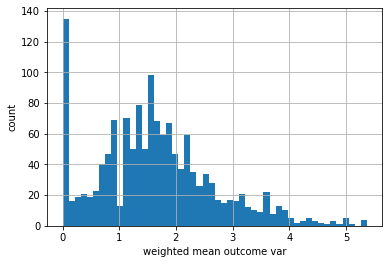

In [626]:
jewish_covid_data['q_results'].hist(bins=50)
plt.ylabel('count')
plt.xlabel('weighted mean outcome var')

I will have to remove the values = 0 for taking the log of the outcome variable.

In [630]:
print(np.sum(jewish_covid_data['q_results'] == 0))
#print(jewish_covid_data[jewish_covid_data['q_results'] != 0][cat_columns])
#print(jewish_covid_data[jewish_covid_data['q_results'] != 0]['ALLWT'])
jewish_covid_data3 = jewish_covid_data[jewish_covid_data['q_results'] != 0]

135
     q41r7 q41r8 q41r9 q41r10
0        0     0     2      2
1        1     2     0      2
2        3     3     3      3
3        1     1     1      1
4        0     0     1      1
...    ...   ...   ...    ...
1407     3     3     2      2
1409     3     2     1      2
1410     3     3     3      3
1411     2     2     2      2
1412     3     1     1      1

[1279 rows x 4 columns]
0       1.275025
1       0.758117
2       1.226917
3       1.252093
4       1.252093
          ...   
1407    1.293090
1409    0.550620
1410    1.482985
1411    1.256136
1412    1.480453
Name: ALLWT, Length: 1279, dtype: float64


Text(0.5, 0, 'log of weighted mean outcome var')

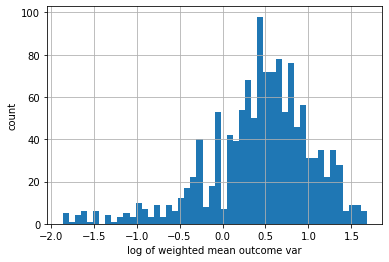

In [631]:
# it's a good candidate (right skew, mostly continuous) for a log transform, let's do that now
# however, I seem to have 0 values, let's check that out

np.log(jewish_covid_data3['q_results']).hist(bins=50, density=False)
plt.ylabel('count')
plt.xlabel('log of weighted mean outcome var')

Looks more gaussian, this should help with our models. I had to play with the conversion of text to numerical for this. Getting 0 for the outcome variable, when I was setting "strongly disagree" to 0 would introduce a bias. It would mean that when I wanted to take the log of this outcome variable, I'd have to remove these 0 values and therefore remove all 'strongly disagree' responses across the board! There is a still a bias, but 0 corresponds to a neutral attitude. I'm more okay with removing those outcome variables. 

~ Also, we only have X removed rows instead of 135 (~10% of the dataset) as was with "strongly disagree" = 0. ~

In [613]:
jewish_covid_data3['q_results'] = np.log(jewish_covid_data3['q_results'])

## Missing values clean-up

In [614]:
# let's look at null values
nulls = jewish_covid_data.isnull().sum()
#print(nulls.sort_values(ascending=False).head(), '\n')

#show features with non-zero amount of missing values only
print(nulls[nulls!=0].sort_values(ascending=False), '\n')

#Now as a %
nulls_percent = nulls[nulls!=0]/jewish_covid_data.shape[0]*100
print('The % of null values per feature:\n')
print(round(nulls_percent.sort_values(ascending=False),2))

q17r8             1414
q30_18            1413
q44_6             1413
q30_19            1413
qOrientation_3    1413
                  ... 
q34                374
q27                374
q23cc2             374
q18                374
q31r12             374
Length: 162, dtype: int64 

The % of null values per feature:

q17r8             100.00
q30_18             99.93
q44_6              99.93
q30_19             99.93
qOrientation_3     99.93
                   ...  
q34                26.45
q27                26.45
q23cc2             26.45
q18                26.45
q31r12             26.45
Length: 162, dtype: float64


In [615]:
#let's drop the record column
jewish_covid_data = jewish_covid_data.drop(['record'],axis=1)

Text(0.5, 0, '% of missing values')

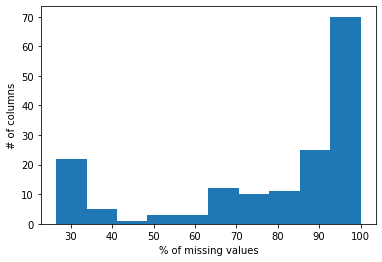

In [616]:
#Examine distribution of null-values column-wise
nulls_percent.plot.hist()
plt.ylabel('# of columns')
plt.xlabel('% of missing values')

Our histogram shows we have feature columns with all sorts of different amounts of missing values, starting at ~26%. Let's see if/how missing values affect our outcome variable, and drop them if there's no effect.

In [617]:
#let's now also drop columns with large amounts of nulls
thresh = len(jewish_covid_data) * .2
jewish_covid_data2 = jewish_covid_data.dropna(thresh = thresh,axis = 1, inplace = False) 

In [618]:
len(jewish_covid_data)

1414

In [619]:
jewish_covid_data2.shape

(1414, 157)

Reduced our dimensionality by 103 features, nice!